In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("clean_ingr_dataset.csv")
df.head()

,Label,brand,name,price,rank,Combination,Dry,Normal,Oily,Sensitive,ingredients
0,Cleanser,ALGENIST,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,0,0,0,0,0,"['c12-15 alkyl benzoate', 'ethylhexyl palmitat..."
1,Cleanser,ALGENIST,Hydrating Essence Toner,25,4.4,0,0,0,0,0,"['water', 'butylene glycol', 'sodium pca', 'wa..."
2,Cleanser,ALGENIST,Multi-Perfecting Detoxifying Exfoliator,38,4.6,0,0,0,0,0,"['water', 'caprylic/capric triglyceride', 'hyd..."
3,Cleanser,AMOREPACIFIC,Treatment Cleansing Foam,50,4.5,1,0,1,1,0,"['water', 'glycerin', 'stearic acid', 'myristi..."
4,Cleanser,AMOREPACIFIC,Treatment Enzyme Peel,60,4.7,1,1,1,1,1,"['mannitol', 'sodium cocoyl glycinate', 'sodiu..."


In [3]:
columns = df[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]
skin_mapping = {
    'Dry': 'D',
    'Oily': 'O',
    'Sensitive': 'S',
    'Combination': 'C',
    'Normal': 'N'
}
skintype = df.apply(lambda row: ','.join(
    [skin_mapping[col] for col in columns if row[col] == 1]) or 'NO',
                    axis=1)
df['skintype'] = skintype

In [4]:
df2 = df.drop(['name', 'ingredients', 'skintype'], axis=1)
X = df2.copy()

le = LabelEncoder()
X['Label'] = le.fit_transform(X['Label'])
X['brand'] = le.fit_transform(X['brand'])
df2['Label'] = le.fit_transform(df2['Label'])

cols = ['price', 'rank']
ss = StandardScaler()
X_t = ss.fit_transform(X[cols])
X[cols] = X_t

X.head()

,Label,brand,price,rank,Combination,Dry,Normal,Oily,Sensitive
0,0,0,-0.390952,-0.080830,0,0,0,0,0
1,0,0,-0.677571,0.388994,0,0,0,0,0
2,0,0,-0.390952,0.702211,0,0,0,0,0
3,0,1,-0.126380,0.545603,1,0,1,1,0
4,0,1,0.094097,0.858819,1,1,1,1,1


C:\Users\User\AppData\Local\Temp/ipykernel_9100/2006946227.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, S, 'bo-', color='black')


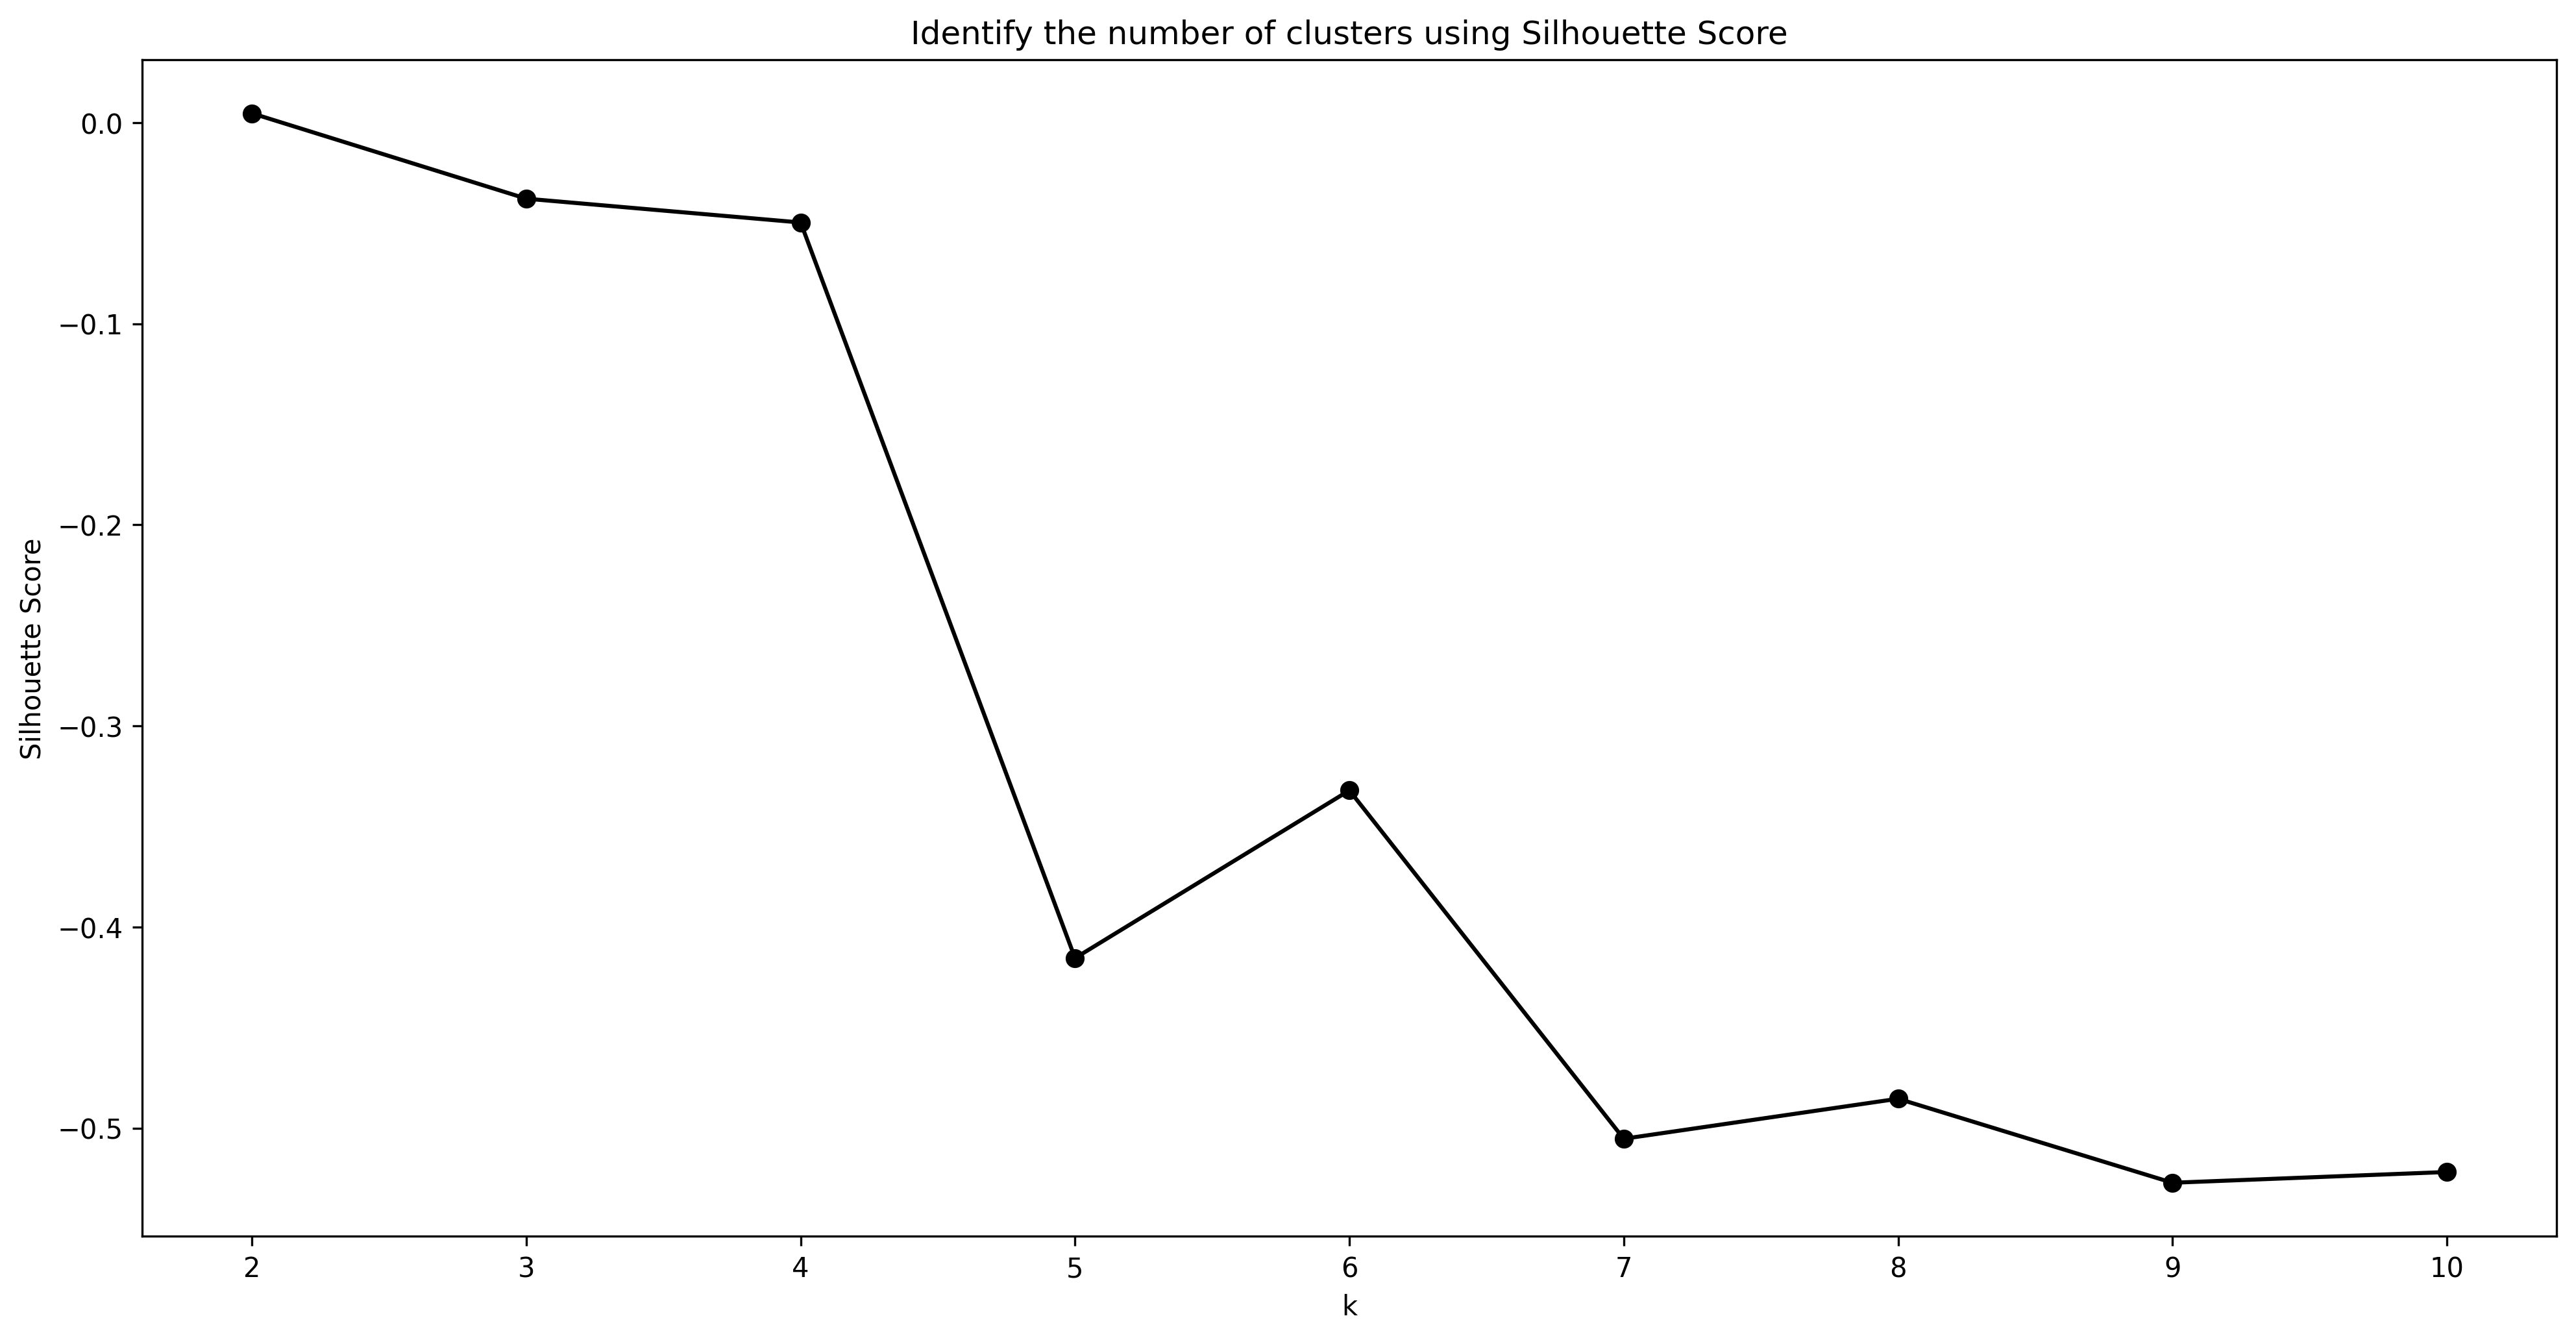

In [24]:
S = []

# Range of clusters to try (2 to 10)
K = range(2, 11)

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='k-means++')
    # Fit the model
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [259]:
model = GaussianMixture(
    n_components=3,  # this is the number of clusters
    covariance_type=
    'full',  # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
    max_iter=300,  # the number of EM iterations to perform. default=100
    n_init=1,  # the number of initializations to perform. default = 1
    init_params=
    'kmeans',  # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
    verbose=0,  # default 0, {0,1,2}
    random_state=42  # for reproducibility
)


In [260]:
clust = model.fit(X)

In [261]:
labels = model.predict(X)

In [262]:
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [263]:
silhouette_score_average = silhouette_score(X, model.predict(X))
silhouette_score_average

-0.03986970634187037

In [237]:
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(2, 20)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:

    # iterate through, taking each value from
    model = GaussianMixture(n_components=each_value,
                            init_params='kmeans',
                            random_state=32)

    # fit it
    model.fit(X)

    # find each silhouette score
    silhouette_score_individual = silhouette_samples(X, model.predict(X))

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:

        # if we find a negative, lets start counting them
        if each_silhouette < 0:

            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1

            else:
                bad_k_values[each_value] += 1

for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')

 This Many Clusters: 2 | Number of Negative Values: 713
 This Many Clusters: 3 | Number of Negative Values: 917
 This Many Clusters: 4 | Number of Negative Values: 993
 This Many Clusters: 5 | Number of Negative Values: 1407
 This Many Clusters: 6 | Number of Negative Values: 1388
 This Many Clusters: 7 | Number of Negative Values: 1383
 This Many Clusters: 8 | Number of Negative Values: 1397
 This Many Clusters: 9 | Number of Negative Values: 1366
 This Many Clusters: 10 | Number of Negative Values: 1348
 This Many Clusters: 11 | Number of Negative Values: 1365
 This Many Clusters: 12 | Number of Negative Values: 1360
 This Many Clusters: 13 | Number of Negative Values: 1380
 This Many Clusters: 14 | Number of Negative Values: 1342
 This Many Clusters: 15 | Number of Negative Values: 1309
 This Many Clusters: 16 | Number of Negative Values: 1343
 This Many Clusters: 17 | Number of Negative Values: 1342
 This Many Clusters: 18 | Number of Negative Values: 1330
 This Many Clusters: 19 |

In [264]:
df2['Label'] = le.fit_transform(df2['Label'])

In [265]:
df2['cluster_label'] = labels

In [257]:
from scipy.spatial import distance

In [241]:
def nearest(product_index, cluster_points, cluster_no):
    distances = []
    #centroid = kmeansOpt.cluster_centers_[cluster_no]
    #prod_dist = distance.euclidean(X.loc[product_index], centroid)
    given_point = X.loc[product_index]
    for point in cluster_points:
        if point != product_index:
            dist = distance.euclidean(X.loc[point], given_point)
            distances.append((point, dist))
    distances.sort(key=lambda x: x[1])
    if (len(distances) < 5):
        return distances
    else:
        return distances[:5]


In [242]:
def recommendations(product_name):

    product_index = df[df['name'] == product_name].index[0]

    cluster_label = df2.loc[product_index, 'cluster_label']
    cluster_points = df2[df2['cluster_label'] == cluster_label].index

    # Extract the nearest points (excluding the user chosen product itself)
    nearest_points = nearest(product_index, cluster_points, cluster_label)

    label = df.loc[product_index, 'Label']
    brand = df.loc[product_index, 'brand']
    price = df.loc[product_index, 'price']
    rank = df.loc[product_index, 'rank']
    skintype = df.loc[product_index, 'skintype']

    #Print the 5 nearest points in the same cluster to the user chosen product
    print(
        f"5 Nearest Points in Cluster {cluster_label} to '{product_name} ({label}, {brand}, {price}£, {rank}, [{skintype}])':"
    )

    recommended_products = []

    for point in nearest_points:
        product_label = df.loc[point[0], 'Label']
        product_brand = df.loc[point[0], 'brand']
        product_price = df.loc[point[0], 'price']
        product_rank = df.loc[point[0], 'rank']
        product_title = df.loc[point[0], 'name']
        product_skintype = df.loc[point[0], 'skintype']
        distance = point[1]
        recommended_products.append(
            (product_title, product_label, product_brand, product_price,
             product_rank, product_skintype, distance))

    for product in recommended_products:
        print(
            f'{product[0]} ({product[1]}, {product[2]}, {product[3]}£, {product[4]}, [{product[5]}]), Distance: {product[6]}'
        )


In [217]:
def recommendations_multiple(products_list):
    all_nearest = []  #5 nearest points of every product in list
    print("Recommendations based on products: ")
    for product in products_list:
        product_index = df[df['name'] == product].index[0]
        cluster_label = df2.loc[product_index, 'cluster_label']
        cluster_points = df2[df2['cluster_label'] == cluster_label].index

        label = df.loc[product_index, 'Label']
        brand = df.loc[product_index, 'brand']
        price = df.loc[product_index, 'price']
        rank = df.loc[product_index, 'rank']
        skintype = df.loc[product_index, 'skintype']
        print(f"{product} ({label}, {brand}, {price}£, {rank}, [{skintype}])")

        # Extract the nearest points (excluding the user chosen product itself)
        nearest_points = nearest(product_index, cluster_points, cluster_label)
        for point in nearest_points:
            all_nearest.append(point)
    all_nearest.sort(key=lambda x: x[1])

    nearest_ten = []
    if (len(all_nearest) < 10):
        nearest_ten = all_nearest
    else:
        nearest_ten = all_nearest[:10]
    recommended_products = []
    print("\n")

    for point in nearest_ten:
        product_label = df.loc[point[0], 'Label']
        product_brand = df.loc[point[0], 'brand']
        product_price = df.loc[point[0], 'price']
        product_rank = df.loc[point[0], 'rank']
        product_title = df.loc[point[0], 'name']
        product_skintype = df.loc[point[0], 'skintype']
        distance = point[1]
        recommended_products.append(
            (product_title, product_label, product_brand, product_price,
             product_rank, product_skintype, distance))

    for product in recommended_products:
        print(
            f'{product[0]} ({product[1]}, {product[2]}, {product[3]}£, {product[4]}, [{product[5]}]), Distance: {product[6]}'
        )


In [266]:
recommendations("Treatment Cleansing Foam")

5 Nearest Points in Cluster 0 to 'Treatment Cleansing Foam (Cleanser, AMOREPACIFIC, 50£, 4.5, [C,N,O])':
The True Tincture Mask - Chamomile (Face Mask, BELIF, 36£, 4.3, [D,N,S]), Distance: 5.761369622614964
The True Cream Aqua Bomb (Moisturizer, BELIF, 38£, 4.5, [C,N,O]), Distance: 5.836951116015325
The True Cream Moisturizing Bomb (Moisturizer, BELIF, 38£, 4.6, [D,N]), Distance: 6.090527434993914
Ever-Matte Poreless Priming Perfector (Treatment, BECCA, 38£, 3.6, [C,O]), Distance: 6.6375155660301575
Soothing & Healing Green Tea Splash Mask (Face Mask, BLITHE, 45£, 4.6, [C,N,O]), Distance: 9.221533418777966


In [244]:
recommendations("Sheer Mineral Sun Spray SPF 50")

5 Nearest Points in Cluster 2 to 'Sheer Mineral Sun Spray SPF 50 (Sun protect, DR. DENNIS GROSS SKINCARE, 42£, 4.1, [NO])':
Dark Spot Sun Defense Broad Spectrum SPF 50 (Sun protect, DR. DENNIS GROSS SKINCARE, 42£, 3.8, [NO]), Distance: 0.4698243830931915
Hyaluronic Marine Hydration Booster (Treatment, DR. DENNIS GROSS SKINCARE, 68£, 4.4, [NO]), Distance: 1.2447241565385614
Premium Beauty Balm SPF 45 (Moisturizer, DR. JART+, 39£, 4.2, [NO]), Distance: 1.424394959740108
Clarifying Colloidal Sulfur Mask (Face Mask, DR. DENNIS GROSS SKINCARE, 42£, 4.3, [NO]), Distance: 2.0243775395523325
Instant Radiance Sun Defense Sunscreen Broad Spectrum SPF 40 (Sun protect, DR. DENNIS GROSS SKINCARE, 42£, 3.9, [C,D,N,O,S]), Distance: 2.257898231241602


In [245]:
recommendations("Rejuvenating Serum")

5 Nearest Points in Cluster 2 to 'Rejuvenating Serum (Treatment, TATA HARPER, 110£, 3.7, [C,D,N,O,S])':
Resurfacing Serum (Treatment, TATA HARPER, 88£, 4.2, [C,D,N,O,S]), Distance: 0.9210997822040633
Silken Pore Perfecting Sunscreen Broad Spectrum SPF 35 PA+++ (Sun protect, TATCHA, 65£, 4.5, [C,D,N,O,S]), Distance: 2.134015531459678
Tarteguard 20 Tinted Moisturizer Broad Spectrum SPF 20 Sunscreen (Sun protect, TARTE, 36£, 4.0, [C,D,N,O,S]), Distance: 2.209664209245963
Tarteguard 30 Vegan Sunscreen Lotion Broad Spectrum SPF 30 (Sun protect, TARTE, 32£, 3.7, [C,D,N,O,S]), Distance: 2.2265285702850535
Tarteguard Mineral Powder Sunscreen Broad Spectrum SPF 30 (Sun protect, TARTE, 28£, 4.2, [C,D,N,O,S]), Distance: 2.425218713447081


In [246]:
recommendations("The Moisturizing Soft Cream")

5 Nearest Points in Cluster 2 to 'The Moisturizing Soft Cream (Moisturizer, LA MER, 175£, 3.8, [C,D,N,O,S])':
Crème de la Mer (Moisturizer, LA MER, 175£, 4.1, [C,D,N,O,S]), Distance: 0.4698243830931915
The Moisturizing Cool Gel Cream (Moisturizer, LA MER, 175£, 3.3, [C,D,N,O,S]), Distance: 0.7830406384886529
The Renewal Oil Mini (Moisturizer, LA MER, 130£, 4.0, [C,D,N,O,S]), Distance: 1.0404114324880378
Treatment Lotion Hydrating Mask (Face Mask, LA MER, 150£, 4.1, [C,D,N,O,S]), Distance: 1.234725536463779
The Renewal Oil (Moisturizer, LA MER, 245£, 4.2, [C,D,N,O,S]), Distance: 1.665624607839136


GMM with reducted ingredients

In [151]:
df_umap = pd.read_csv("umap_dataset.csv")
df_umap = df_umap[[
    'name', 'umap_comp_1', 'umap_comp_2', 'umap_comp_3'
]]
df_umap

,name,umap_comp_1,umap_comp_2,umap_comp_3
0,GENIUS Ultimate Anti-Aging Melting Cleanser,25.197624,11.607482,-19.145840
1,Hydrating Essence Toner,25.695068,12.216971,-17.314213
2,Multi-Perfecting Detoxifying Exfoliator,26.186981,11.794188,-17.877375
3,Treatment Cleansing Foam,24.137400,10.941088,-18.118677
4,Treatment Enzyme Peel,23.696272,11.623331,-19.437582
...,...,...,...,...
1421,Rejuvenating Serum,24.553234,10.302903,-19.850400
1422,Resurfacing Serum,24.608452,10.334100,-19.819975
1423,Luminous Deep Hydration Firming Serum,25.822046,12.765291,-18.944390
1424,Snow Mushroom Water Serum,25.009855,12.462429,-18.501976


In [152]:
df3 = df.drop(['ingredients', 'skintype'], axis=1)
X2 = df3.copy()

le = LabelEncoder()
X2['Label'] = le.fit_transform(X2['Label'])
X2['brand'] = le.fit_transform(X2['brand'])
df3['Label'] = le.fit_transform(df3['Label'])
X2.head()


,Label,brand,name,price,rank,Combination,Dry,Normal,Oily,Sensitive
0,0,0,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,0,0,0,0,0
1,0,0,Hydrating Essence Toner,25,4.4,0,0,0,0,0
2,0,0,Multi-Perfecting Detoxifying Exfoliator,38,4.6,0,0,0,0,0
3,0,1,Treatment Cleansing Foam,50,4.5,1,0,1,1,0
4,0,1,Treatment Enzyme Peel,60,4.7,1,1,1,1,1


In [153]:
X2 = X2.merge(df_umap, on='name')
X2.head()

,Label,brand,name,price,rank,Combination,Dry,Normal,Oily,Sensitive,umap_comp_1,umap_comp_2,umap_comp_3
0,0,0,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,0,0,0,0,0,25.197624,11.607482,-19.145840
1,0,0,Hydrating Essence Toner,25,4.4,0,0,0,0,0,25.695068,12.216971,-17.314213
2,0,0,Multi-Perfecting Detoxifying Exfoliator,38,4.6,0,0,0,0,0,26.186981,11.794188,-17.877375
3,0,1,Treatment Cleansing Foam,50,4.5,1,0,1,1,0,24.137400,10.941088,-18.118677
4,0,1,Treatment Enzyme Peel,60,4.7,1,1,1,1,1,23.696272,11.623331,-19.437582


In [154]:
X2 = X2.drop('name', axis=1)

In [155]:
cols = ['price', 'rank', 'umap_comp_1', 'umap_comp_2', 'umap_comp_3']
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_t = ss.fit_transform(X2[cols])

X2[cols] = X_t

X2.head()

,Label,brand,price,rank,Combination,Dry,Normal,Oily,Sensitive,umap_comp_1,umap_comp_2,umap_comp_3
0,0,0,-0.390952,-0.080830,0,0,0,0,0,0.322372,0.016629,-0.450137
1,0,0,-0.677571,0.388994,0,0,0,0,0,0.374878,0.632272,-0.244018
2,0,0,-0.390952,0.702211,0,0,0,0,0,0.426799,0.205220,-0.307392
3,0,1,-0.126380,0.545603,1,0,1,1,0,0.210464,-0.656494,-0.334547
4,0,1,0.094097,0.858819,1,1,1,1,1,0.163903,0.032638,-0.482967


In [188]:
model2 = GaussianMixture(
    n_components=2,  # this is the number of clusters
    covariance_type=
    'full',  # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
    max_iter=300,  # the number of EM iterations to perform. default=100
    n_init=1,  # the number of initializations to perform. default = 1
    init_params=
    'kmeans',  # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
    verbose=0,  # default 0, {0,1,2}
    random_state=42  # for reproducibility
)

In [189]:
clust2 = model2.fit(X2)

In [190]:
labels2 = model2.predict(X2)

In [192]:
df2['cluster_label'] = labels2

In [193]:
recommendations('FUTURE RESPONSE Age Defense Creme SPF 30')

5 Nearest Points in Cluster 0 to 'FUTURE RESPONSE Age Defense Creme SPF 30 (Sun protect, AMOREPACIFIC, 195£, 3.8, [C,D,N,O,S])':
FUTURE RESPONSE Age Defense Creme (Moisturizer, AMOREPACIFIC, 195£, 4.4, [C,D,N,O,S]), Distance: 1.372202537454145
FUTURE RESPONSE Age Defense Serum (Treatment, AMOREPACIFIC, 160£, 4.2, [C,D,N,O,S]), Distance: 1.409925388625825
Vintage Single Extract Essence (Moisturizer, AMOREPACIFIC, 145£, 4.5, [C,D,N,O]), Distance: 2.101672661280991
GENIUS Ultimate Anti-Aging Vitamin C+ Serum (Treatment, ALGENIST, 118£, 3.9, [C,D,N,O,S]), Distance: 2.2150869406174034
GENIUS Liquid Collagen (Treatment, ALGENIST, 115£, 4.0, [C,D,N,O,S]), Distance: 2.28235434255505


In [170]:
recommendations("Rejuvenating Serum")

5 Nearest Points in Cluster 0 to 'Rejuvenating Serum (Treatment, TATA HARPER, 110£, 3.7, [C,D,N,O,S])':
Resurfacing Serum (Treatment, TATA HARPER, 88£, 4.2, [C,D,N,O,S]), Distance: 0.9210997822040633
Silken Pore Perfecting Sunscreen Broad Spectrum SPF 35 PA+++ (Sun protect, TATCHA, 65£, 4.5, [C,D,N,O,S]), Distance: 2.134015531459678
Tarteguard 20 Tinted Moisturizer Broad Spectrum SPF 20 Sunscreen (Sun protect, TARTE, 36£, 4.0, [C,D,N,O,S]), Distance: 2.209664209245963
Tarteguard 30 Vegan Sunscreen Lotion Broad Spectrum SPF 30 (Sun protect, TARTE, 32£, 3.7, [C,D,N,O,S]), Distance: 2.2265285702850535
Tarteguard Mineral Powder Sunscreen Broad Spectrum SPF 30 (Sun protect, TARTE, 28£, 4.2, [C,D,N,O,S]), Distance: 2.425218713447081


In [184]:
silhouette_score_average = silhouette_score(X2, model2.predict(X2))
silhouette_score_average

-0.6309424345073332

In [185]:
recommendations('Moment of Truth™ 2-in-1 Polishing Sugar Mask')

5 Nearest Points in Cluster 12 to 'Moment of Truth™ 2-in-1 Polishing Sugar Mask (Cleanser, OLEHENRIKSEN, 42£, 4.5, [C,D,N,O,S])':
Wonderfeel™ Double Cleanser (Cleanser, OLEHENRIKSEN, 32£, 4.4, [C,D,N,O,S]), Distance: 0.27043679034570645
The Clean Truth™ Foaming Cleanser (Cleanser, OLEHENRIKSEN, 30£, 4.4, [C,D,N,O,S]), Distance: 0.307448266239293
Balancing Force™ Oil Control Toner (Cleanser, OLEHENRIKSEN, 26£, 4.4, [C,D,N,O,S]), Distance: 0.3859631880820063
Face the Truth™ Gel Cleanser (Cleanser, OLEHENRIKSEN, 24£, 4.5, [C,D,N,O,S]), Distance: 0.39685796475975754
Transforming Walnut Scrub (Cleanser, OLEHENRIKSEN, 28£, 4.7, [C,D,N,O,S]), Distance: 0.4397498475161682


In [186]:
recommendations("The Moisturizing Soft Cream")

5 Nearest Points in Cluster 7 to 'The Moisturizing Soft Cream (Moisturizer, LA MER, 175£, 3.8, [C,D,N,O,S])':
The Renewal Oil (Moisturizer, LA MER, 245£, 4.2, [C,D,N,O,S]), Distance: 1.665624607839136
The Moisturizing Soft Lotion (Moisturizer, LA MER, 270£, 3.6, [C,D,N,O,S]), Distance: 2.117817882315839
The Revitalizing Hydrating Serum (Treatment, LA MER, 205£, 4.2, [C,D,N,O,S]), Distance: 2.197704997896513
Younger® Revealing Mask Intense (Face Mask, LANCER, 250£, 4.3, [C,D,N,O,S]), Distance: 2.312458094008741
The Moisturizing Matte Lotion (Moisturizer, LA MER, 270£, 3.9, [N,O]), Distance: 2.722420662879596


In [187]:
recommendations('Ceramidin™ Cream')

5 Nearest Points in Cluster 9 to 'Ceramidin™ Cream (Moisturizer, DR. JART+, 48£, 4.6, [C,D,N,S])':
Black Label Detox BB Beauty Balm (Moisturizer, DR. JART+, 36£, 4.1, [C,N,S]), Distance: 1.2973630842124637
Ceramidin™ Facial Mask (Face Mask, DR. JART+, 6£, 4.6, [C,D,N,S]), Distance: 1.3628938152764667
Hydration Lover Rubber Mask (Face Mask, DR. JART+, 12£, 4.0, [C,D,N,S]), Distance: 1.5852207355976076
Hyaluronic Marine Hydrating Modeling Mask (Face Mask, DR. DENNIS GROSS SKINCARE, 48£, 4.1, [C,D,N]), Distance: 1.900829461452215
Ferulic Acid + Retinol Brightening Solution (Treatment, DR. DENNIS GROSS SKINCARE, 88£, 4.1, [C,D,N,S]), Distance: 2.52802529103423
